In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import torch
import os
from numba import cuda 

from helpers.composite_helpers import *

In [3]:
sim_color = "#990000"
trans_color = "#674ea7"
dat_color = "#1c4587"

dpi = 800

feta_dir = "/global/home/users/rrmastandrea/FETA/"

In [4]:
# get the data

df_sim = get_lhco(sim_type = "herwig")
data_sim = select_lhco_features(df_sim, feature_type = 0).to_numpy()

df_dat = get_lhco(sim_type = "pythia")
data_dat = select_lhco_features(df_dat, feature_type = 0).to_numpy()

df_signal = get_lhco(sim_type = "pythia", sm = "signal")
data_signal = select_lhco_features(df_signal, feature_type = 0).to_numpy()


events_anomalydetection_herwig_features.h5
events_anomalydetection_v2.features.h5
events_anomalydetection_v2.features.h5


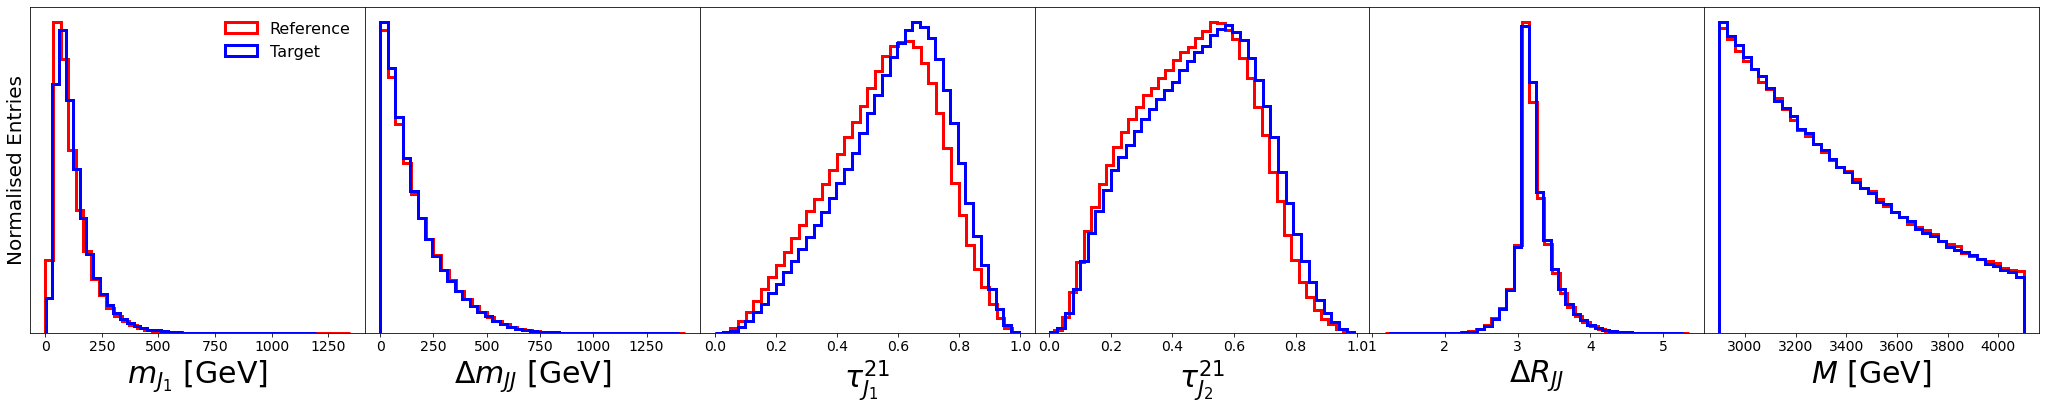

In [5]:
# features plots

alpha = 0.5
n_plot = 10000
bins = 40
w = 3

f_1 = 20
f_2 = 16
f_3 = 14

labels =  ["$m_{J_1}$ [GeV]", "$\Delta m_{JJ}$ [GeV]", "$\\tau^{21}_{J_1}$", "$\\tau^{21}_{J_2}$", "$\Delta R_{JJ}$", "$M$ [GeV]"]




fig, ax = plt.subplots(1, 6, figsize = (36, 6))

for i in range(6):
    if i != 5:
        ax[i].hist(data_sim[:,i], bins = bins, density = True, label = "Reference", histtype = "step", color = "red", linewidth = w)
        ax[i].hist(data_dat[:,i], bins = bins, density = True, label = "Target", histtype = "step", color = "blue", linewidth = w)
        
    else:
        ax[i].hist(data_sim[:,i], bins = np.linspace(2900, 4100, bins), density = True, label = "Reference", histtype = "step", color = "red", linewidth = w)
        ax[i].hist(data_dat[:,i], bins = np.linspace(2900, 4100, bins), density = True, label = "Target", histtype = "step", color = "blue", linewidth = w)
    
    ax[i].set_xlabel(labels[i], fontsize = f_1*1.5)
    
    ax[i].tick_params(axis='both', labelsize=f_3)
    ax[i].set_yticks([])
plt.subplots_adjust(wspace=0, hspace=0)


ax[0].set_ylabel("Normalised Entries", fontsize = f_1)  
ax[0].legend(fontsize = f_2, loc = "upper right", frameon = False)
fig.savefig("paper_plots/features_f4f.pdf")
fig.show()

   

